###    Import libraries

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

### Load CSV data into Dataframe

In [3]:
import sqlalchemy
import pandas as pd
import pymysql
import random
CustomerBase = pd.read_csv("CUSTOMER_BASE_CHENNAI.csv")
Records,Attribute=CustomerBase.shape
print("CustomerBase Records {} and Attributes {}".format(Records,Attribute))
CustomerBase.rename(columns={"cust_acct_no":"CustomerNo","sex_code":"Gender"},inplace=True)
CustomerBase=CustomerBase.head(499)
cid=[random.randrange(10000) for i in range(1, 500)]
CustomerBase["CustomerNo"]=cid
CustomerBase

TransactionBase= pd.read_csv("TransactionBase.csv")
Records,Attribute=TransactionBase.shape
print("TransactionBase Records {} and Attributes {}".format(Records,Attribute))
TransactionBase.rename(columns={"CUSTOMER_NO":"CustomerNo"},inplace=True)
TransactionBase=TransactionBase.head(499)
TransactionBase["CustomerNo"]=cid
TransactionBase

# SpendAnalyser=pd.read_sql_table('SpendAnalyser',engine)
SpendAnalyser= pd.read_csv("SpendAnalyser.csv")
SpendAnalyser.rename(columns={"CUST_NO":"CustomerNo"},inplace=True)
SpendAnalyser=SpendAnalyser.head(499)
SpendAnalyser["CustomerNo"]=cid
Records,Attribute=SpendAnalyser.shape
print("SpendAnalyser Records {} and Attributes {}".format(Records,Attribute))
SpendAnalyser


CustomerBaseAndTransactionBase=pd.merge(CustomerBase,TransactionBase,on="CustomerNo",how="inner").sort_values(by=["CustomerNo"])
CustomerBaseAndTransactionBase

SpendAnalyserTranspose=SpendAnalyser.pivot_table(index='CustomerNo',columns="CLASSIFICATION",values="AMOUNT",aggfunc='mean')
SpendAnalyserTranspose.reset_index(inplace=True)
SpendAnalyserTransposeColumns=[ i.replace("/","_").replace(" ","_") for i in list(SpendAnalyserTranspose.columns)]
SpendAnalyserTranspose.columns=SpendAnalyserTransposeColumns
SpendAnalyserTranspose

CustomerAndTransactionAndSpendAnalyser=pd.merge(CustomerBaseAndTransactionBase,SpendAnalyserTranspose,on="CustomerNo",how="inner")
CustomerAndTransactionAndSpendAnalyser
CustomerAndTransactionAndSpendAnalyser.fillna(0,inplace=True)

CustomerBase Records 100000 and Attributes 30
TransactionBase Records 100000 and Attributes 5
SpendAnalyser Records 499 and Attributes 3


### Fill Missing Values 

In [5]:
# df['home_ownership']=df['home_ownership'].fillna('missing')
# df['grade']=df['grade'].fillna('missing')
# df['purpose']=df['purpose'].fillna('missing')
# df['term']=df['term'].fillna('missing')
# df.fillna(0,inplace=True)

In [6]:
df=CustomerAndTransactionAndSpendAnalyser.copy()

### Descriptive Analysis

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
home_branch_no,521.0,6.700000e+01,0.000000e+00,67.00,67.00,67.000,67.00,67.00
CustomerNo,521.0,4.945775e+03,2.923015e+03,4.00,2206.00,4961.000,7522.00,9996.00
no_of_deposits,521.0,1.777351e+00,4.164242e-01,1.00,2.00,2.000,2.00,2.00
no_of_loan_accounts,521.0,6.468330e-01,9.230148e-01,0.00,0.00,0.000,2.00,2.00
ourfastagspent,521.0,1.134357e+02,1.456151e+02,0.00,0.00,0.000,300.00,300.00
otherfastagspent,521.0,0.000000e+00,0.000000e+00,0.00,0.00,0.000,0.00,0.00
creditcardpayment,521.0,0.000000e+00,0.000000e+00,0.00,0.00,0.000,0.00,0.00
mfpayment,521.0,0.000000e+00,0.000000e+00,0.00,0.00,0.000,0.00,0.00
billpayment,521.0,0.000000e+00,0.000000e+00,0.00,0.00,0.000,0.00,0.00
sbavgbal,521.0,8.478853e+03,2.125583e+03,8248.54,8248.54,8249.540,8250.54,28152.68


### Calculate Average BAD LOAN percentage

In [167]:
print('Total accounts opened =>',len(df['bad_loan']))
print('Bad   accounts=>',len(df[df['bad_loan']==1]))
print('Bad Accounts  Percentage=>',(len(df[df['bad_loan']==1])/len(df['id']))*100)

Total accounts opened => 20000
Bad   accounts=> 4000
Bad Accounts  Percentage=> 20.0


In [168]:

def plot_diagram(column_name,npa_df,target='bad_loan',fig_size=None):
    mean_column_name=column_name+'mean'
    
    print(column_name)
    
    LapsUpdated = pd.DataFrame()
    
    target_sum = target+'sum'
    target_count = target+'count'
    target_percentage = target+'_Percentage'
    target_label = target+' Percentage'
    
    bin_column_name=column_name+''
    mean_bin_column_name=bin_column_name+'mean'
    LapsUpdated[bin_column_name]=npa_df[column_name]
        
    
    LapsUpdated[target]=npa_df[target]
    
    FinalDataFrame=LapsUpdated.groupby(bin_column_name).agg({target:['sum','count']})
    FinalDataFrame.columns=["".join(j) for j in list(FinalDataFrame.columns)]
    FinalDataFrame.reset_index(inplace=True)
    
    FinalDataFrame[target_percentage]=FinalDataFrame[target_sum]/FinalDataFrame[target_count]*100
    FinalDataFrame.sort_values(by=[target_percentage],ascending=False,inplace=True)
    FinalDataFrame.rename(columns={target_sum:target+' total',target_count:'Total Records'},inplace=True)

    display(FinalDataFrame)
    if fig_size:
        plt.figure(figsize=fig_size)
    plt.ylabel(target_label)
    plt.xlabel(bin_column_name)
    plt.title(bin_column_name)
    plt.bar(FinalDataFrame[bin_column_name].astype(str),FinalDataFrame[target_percentage],width=0.8)
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    
    



In [169]:
def plot_regression_decile(column,final_df,target='bad_loan',additional_columns=[]):
    print('')
    print(column)
    tar_percentage = "Percentage_"+target
    label_plot = 'Percentage_of_'+target
    target_mean = target+'mean'
    target_sum = target+'sum'
    target_count = target+'count'
    column_mean = column+'mean'
    
    agg_condition = {target:['sum','count'],column:['min','max','mean']}
    
    for acl in additional_columns:
            agg_condition[acl]=['sum','count']
        
    
    
    ContinousData = final_df
    GrandTotal_non_zero = ContinousData[ContinousData[column]!=0]
    GrandTotal_non_zero=GrandTotal_non_zero.sort_values(by=[column],ascending=False)    
    GrandTotal_non_zero['Decile_rank'] = pd.qcut(GrandTotal_non_zero[column].rank(method='first'), 10,labels = False)
    print("Unique Values {}".format(len(set(GrandTotal_non_zero[column].values))))
    Records,Columns=GrandTotal_non_zero.shape
    FinalDataFrame=GrandTotal_non_zero.groupby("Decile_rank").agg(agg_condition)
    FinalDataFrame.columns=["".join(j) for j in list(FinalDataFrame.columns)]
    FinalDataFrame.reset_index(inplace=True)
    FinalDataFrame[tar_percentage]=FinalDataFrame[target_sum]/FinalDataFrame[target_count]*100
    
    GrandTotal_zero = ContinousData[ContinousData[column]==0]
    GrandTotal_zero=GrandTotal_zero.sort_values(by=[column],ascending=False)    
    GrandTotal_zero['Decile_rank'] =10
    Records,Columns=GrandTotal_zero.shape
    FinalDataFrame2=GrandTotal_zero.groupby("Decile_rank").agg(agg_condition)
    FinalDataFrame2.columns=["".join(j) for j in list(FinalDataFrame2.columns)]
    FinalDataFrame2.reset_index(inplace=True)
    FinalDataFrame2[tar_percentage]=FinalDataFrame2[target_sum]/FinalDataFrame2[target_count]*100
    
    FinalDataFrame = pd.concat([FinalDataFrame,FinalDataFrame2],axis=0)
    FinalDataFrame.sort_values(by=[column_mean],ascending=False,inplace=True)
    
    FinalDataFrame[column_mean].fillna(0, inplace=True)
    FinalDataFrame[column_mean] = FinalDataFrame[column_mean].astype(np.float128)
    
    FinalDataFrame[tar_percentage] = FinalDataFrame[tar_percentage].astype(np.float128)
    FinalDataFrame.sort_values(by=[tar_percentage],ascending=False,inplace=True)
    
    for acl in additional_columns:
        ad_per  = "Percentage_"+acl
        ad_sum  = acl+'sum'
        ad_count = acl+'count'
        FinalDataFrame[ad_per] = FinalDataFrame[ad_sum]/FinalDataFrame[ad_count]*100
        FinalDataFrame[ad_per] = FinalDataFrame[ad_per].astype(np.float128)
    
    FinalDataFrame.rename(columns={target_sum:target+' total',target_count:'Total Records'},inplace=True)

    
    reg=LinearRegression()
    reg.fit(FinalDataFrame[[column_mean]],FinalDataFrame[tar_percentage])
    reg.predict(FinalDataFrame[[column_mean]])
    print("Co-effictient {}".format(reg.coef_))
    print("Intercept {}".format(reg.intercept_))
    plt.title(column)
    plt.xlabel(column_mean)
    display(FinalDataFrame)
    plt.ylabel(label_plot)
    plt.scatter(FinalDataFrame[[column_mean]],FinalDataFrame[tar_percentage],color="red",marker="+")
    plt.plot(FinalDataFrame[[column_mean]],reg.predict(FinalDataFrame[[column_mean]]),color='blue')                                                      
    plt.show()
    print('-------------------------------------------------------------------------------------------------------')


In [170]:
categorical_columns = ['id','home_ownership','grade','purpose','term','last_major_derog_none','last_delinq_none']

# Bivariate Analysis

#### We will conduct bivariate analysis using bar charts for categorical features and scatter plots with linear regression lines for continuous features.

### Plot bar chart for categorical features

home_ownership


,home_ownership,bad_loan total,Total Records,bad_loan_Percentage
2,RENT,1684,7052,23.879750
1,OWN,316,1613,19.590825
3,missing,292,1491,19.584172
0,MORTGAGE,1708,9844,17.350670


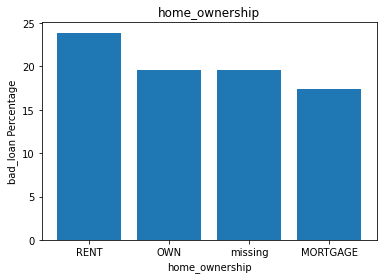

-----------------------------------------------------------------------------------------------------
grade


,grade,bad_loan total,Total Records,bad_loan_Percentage
5,F,351,865,40.578035
6,G,65,169,38.461538
4,E,542,1645,32.948328
3,D,979,3554,27.546427
2,C,1172,5566,21.056414
1,B,767,6042,12.694472
0,A,124,2159,5.743400


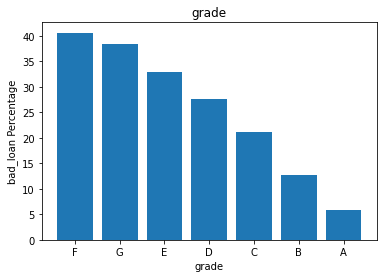

-----------------------------------------------------------------------------------------------------
purpose


,purpose,bad_loan total,Total Records,bad_loan_Percentage
9,small_business,88,265,33.207547
8,other,274,1021,26.836435
7,moving,30,123,24.390244
10,vacation,26,112,23.214286
5,major_purchase,86,379,22.691293
6,medical,39,175,22.285714
11,wedding,19,86,22.093023
2,debt_consolidation,2482,12337,20.118343
3,home_improvement,209,1096,19.069343
0,car,30,168,17.857143


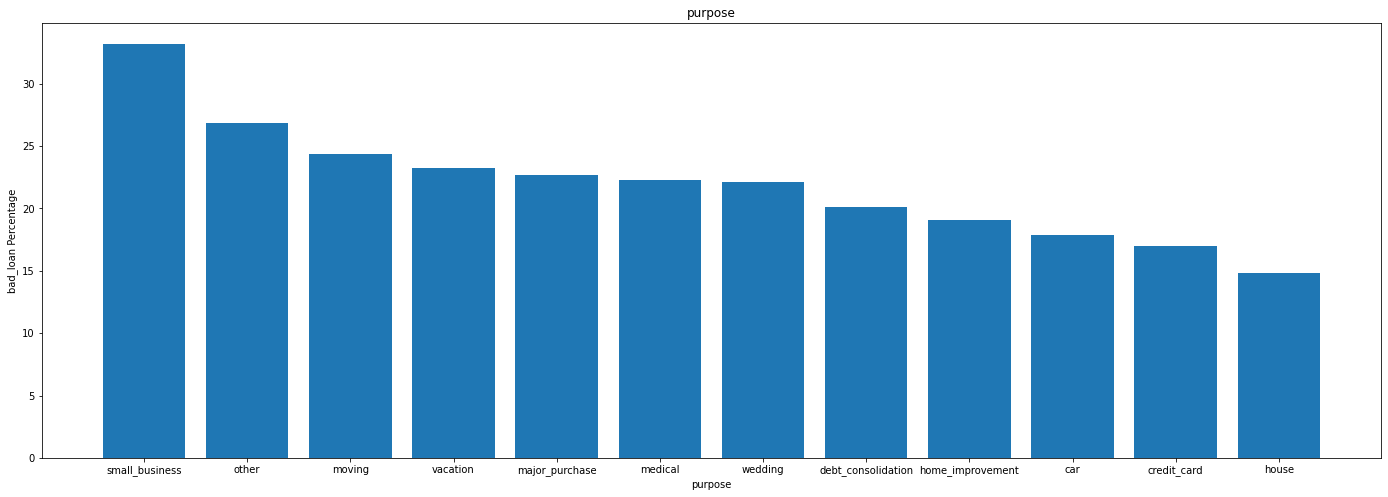

-----------------------------------------------------------------------------------------------------
term


,term,bad_loan total,Total Records,bad_loan_Percentage
2,60 months,1461,4999,29.225845
1,36 months,2534,14969,16.928319
0,36 Months,5,32,15.625000


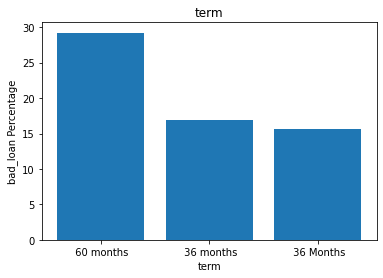

-----------------------------------------------------------------------------------------------------
last_major_derog_none


,last_major_derog_none,bad_loan total,Total Records,bad_loan_Percentage
0,0.0,3914,19564,20.006134
1,1.0,86,436,19.724771


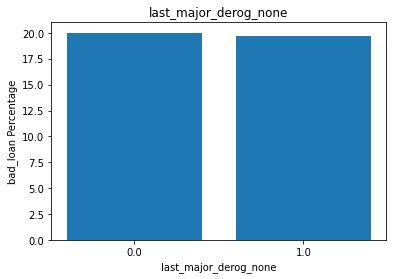

-----------------------------------------------------------------------------------------------------
last_delinq_none


,last_delinq_none,bad_loan total,Total Records,bad_loan_Percentage
1,1,2272,10932,20.783022
0,0,1728,9068,19.056021


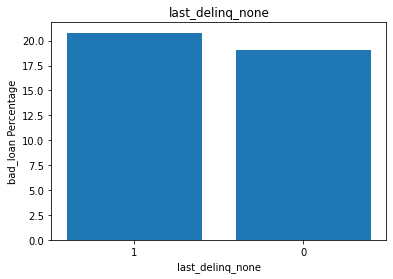

-----------------------------------------------------------------------------------------------------


In [171]:
for cl in categorical_columns:
    figsize=(24,8) if cl=='purpose' else None
    if cl!='id':
        plot_diagram(cl,df,target='bad_loan',fig_size=figsize)
        

### Scatter Plot with Linear Regression Line for continuous features


annual_inc
Unique Values 2566
Co-effictient [-0.0001189]
Intercept 28.721518733044462


,Decile_rank,bad_loan total,Total Records,annual_incmin,annual_incmax,annual_incmean,Percentage_bad_loan
0,0,611,2000,8412,35000,28729.2150,30.55
1,1,529,2000,35000,43740,39639.0175,26.45
2,2,487,2000,43742,50000,47171.0935,24.35
4,4,416,2000,57000,65000,60498.8530,20.80
3,3,401,2000,50000,57000,53383.0855,20.05
5,5,366,2000,65000,72000,68146.3155,18.30
6,6,334,2000,72000,82000,76922.7420,16.70
7,7,306,2000,82000,95000,88019.5480,15.30
8,8,285,2000,95000,120000,104828.2375,14.25
9,9,265,2000,120000,1000000,166157.6760,13.25


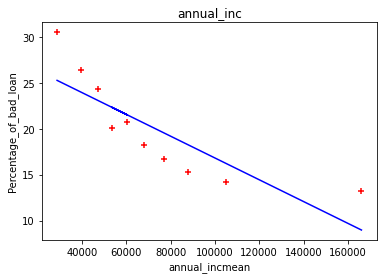

-------------------------------------------------------------------------------------------------------

short_emp
Unique Values 1
Co-effictient [4.70735524]
Intercept 19.470422535211267


,Decile_rank,bad_loan total,Total Records,short_empmin,short_empmax,short_empmean,Percentage_bad_loan
5,5,69,225,1,1,1.0,30.666667
3,3,65,225,1,1,1.0,28.888889
0,0,57,225,1,1,1.0,25.333333
8,8,56,225,1,1,1.0,24.888889
4,4,53,225,1,1,1.0,23.555556
7,7,51,225,1,1,1.0,22.666667
9,9,50,225,1,1,1.0,22.222222
6,6,49,225,1,1,1.0,21.777778
1,1,48,225,1,1,1.0,21.333333
2,2,46,225,1,1,1.0,20.444444


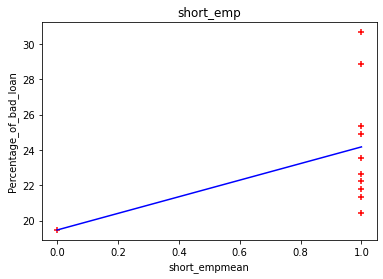

-------------------------------------------------------------------------------------------------------

emp_length_num
Unique Values 11
Co-effictient [-0.52312893]
Intercept 23.74974853546274


,Decile_rank,bad_loan total,Total Records,emp_length_nummin,emp_length_nummax,emp_length_nummean,Percentage_bad_loan
0,10,215,797,0,0,0.000000,26.976161
0,0,428,1921,1,2,1.243623,22.280062
8,8,405,1920,11,11,11.000000,21.093750
1,1,402,1920,2,3,2.604687,20.937500
2,2,391,1920,3,4,3.702604,20.364583
3,3,388,1920,4,6,5.307292,20.208333
4,4,387,1921,6,8,6.661114,20.145757
5,5,371,1920,8,9,8.320833,19.322917
6,6,361,1920,9,11,10.206250,18.802083
7,7,332,1920,11,11,11.000000,17.291667


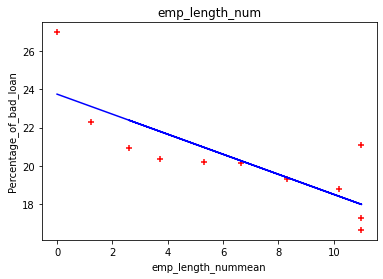

-------------------------------------------------------------------------------------------------------

dti
Unique Values 34
Co-effictient [0.60891437]
Intercept 10.709990354148905


,Decile_rank,bad_loan total,Total Records,dtimin,dtimax,dtimean,Percentage_bad_loan
9,9,596,1976,27,34,29.653846,30.161943
8,8,550,1975,23,27,24.717468,27.848101
7,7,496,1975,20,23,21.620253,25.113924
6,6,425,1975,18,20,19.042025,21.518987
5,5,391,1975,16,18,16.830380,19.797468
4,4,338,1975,14,16,14.729620,17.113924
2,2,331,1975,9,12,10.412152,16.759494
3,3,313,1975,12,14,12.651139,15.848101
0,10,39,248,0,0,0.000000,15.725806
1,1,295,1975,6,9,7.907342,14.936709


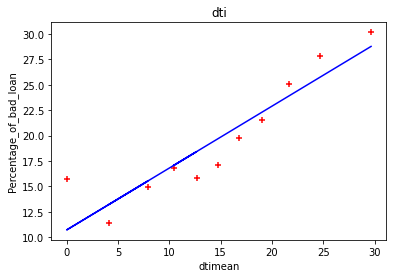

-------------------------------------------------------------------------------------------------------

revol_util
Unique Values 110
Co-effictient [0.16550998]
Intercept 10.844701014477012


,Decile_rank,bad_loan total,Total Records,revol_utilmin,revol_utilmax,revol_utilmean,Percentage_bad_loan
9,9,520,1987,86,5010,94.145949,26.170106
8,8,485,1986,77,86,81.448137,24.420947
7,7,457,1987,70,77,73.552089,22.999497
6,6,441,1986,63,70,66.752769,22.205438
5,5,417,1987,57,63,60.213387,20.986412
4,4,383,1986,50,57,53.602719,19.284995
3,3,376,1987,43,50,46.619024,18.922999
1,1,333,1987,24,35,29.445898,16.758933
2,2,331,1986,35,43,38.833837,16.666667
0,0,242,1987,1,24,14.249623,12.179165


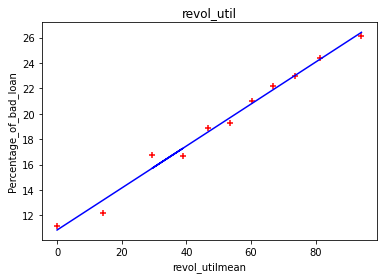

-------------------------------------------------------------------------------------------------------

total_rec_late_fee
Unique Values 46
Co-effictient [0.84219343]
Intercept 47.945368805002616


,Decile_rank,bad_loan total,Total Records,total_rec_late_feemin,total_rec_late_feemax,total_rec_late_feemean,Percentage_bad_loan
6,6,20,22,25,29,27.500000,90.909091
9,9,19,23,41,96,58.000000,82.608696
7,7,19,23,29,34,31.347826,82.608696
2,2,18,23,15,15,15.000000,78.260870
0,0,17,23,6,14,13.652174,73.913043
8,8,16,23,34,40,36.217391,69.565217
4,4,16,23,16,19,17.130435,69.565217
5,5,15,23,19,25,21.608696,65.217391
1,1,14,23,14,15,14.913043,60.869565
3,3,10,22,15,16,15.136364,45.454545


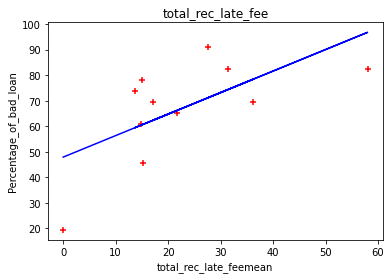

-------------------------------------------------------------------------------------------------------

od_ratio
Failed---

bad_loan
Unique Values 1
Failed---


In [172]:


for ac in df.columns:
    if ac not in categorical_columns:
        try:
            df[ac] = df[ac].astype(int)
        except Exception:
            pass 
        try:
            plot_regression_decile(ac,df,target='bad_loan')
        except Exception as e:
#             print(e)
            print("Failed---")
            pass

In [173]:
df['home_ownership_label']=df['home_ownership'].astype('category').cat.codes+1

df['grade_label']=df['grade'].astype('category').cat.codes+1

df['purpose_label']=df['purpose'].astype('category').cat.codes+1

df['term_label']=df['term'].astype('category').cat.codes+1



In [174]:
def convert_condition_into_string(ca):
    gte = '>='
    eqt = '=='
    lte = '<='
    lt  = '<'
    gt  = '>'
    
    if'and' in ca:
        ca = '_between_'+ca
        ca = ca.replace('and','to')
        ca = ca.replace(gte,'_').replace(eqt,'_').replace(lte,'_').replace(lt,'_').replace(gt,'_')
        
        ca = ca.replace('x','_')
        ca = ca.replace(' ', '_')
        ca = ca.replace('__','_')
    if gte in ca:
        ca = ca.replace(gte,'_gte_')
    if eqt in ca:
        ca = ca.replace(eqt,'_eq_')
    if lte in ca:
        ca = ca.replace(lte,'_lte_')
    if lt in ca:
        ca = ca.replace(lt,'_lt_')
    if gt in ca:
        ca = ca.replace(gt,'_gt_')    
    return ca

def format_the_column(ip_df):
    f_columns = []
    for ip in ip_df.columns:
        v=ip.replace('-','_').replace(' ','_').replace('(','_').replace(')','_').replace('/','_').replace('%','_').replace('&','_')
        v=v.replace('>','_').replace('<','_')
        v=v.replace('_____','_').replace('____','_').replace('.','_')
        v=v.replace('__',' ')
        v=v.replace('_',' ')
        v=v.replace('min',' min').replace('max',' max').replace('mean',' mean').replace('PredictionProbability','Prediction Probability')
        f_columns.append(v)
    
    ip_df.columns=  f_columns
    return ip_df

In [175]:
filter_conditions={"annual_inc":"<=57000",
"short_emp":">=1",
"emp_length_num":">=11",
"dti":">=20",
"revol_util":">60",
"total_rec_late_fee":">=1",
"grade_label":">=3",
"purpose_label":">=3",
"term_label":">=3"}

In [176]:
plot_df=df.copy()

In [177]:
new_columns_with_condition = ['bad_loan']

# Apply optimal Binning Condition
for feild in filter_conditions.keys():
    column=feild   
    condition = filter_conditions[feild]    

    if condition:
        formated_condition_header = convert_condition_into_string(condition)
        new_column = column+''+formated_condition_header
        condition_str = "plot_df[new_column]=[ 1 if x{} else 0 for x in plot_df[column]]".format(condition)
        exec(condition_str)
    else:
        new_column = column+''
    new_columns_with_condition.append(new_column)
model_df = plot_df[new_columns_with_condition]




#### Rename Columns with optimal binning condition we provided for better undertanding

In [178]:

#Rename Columns with condition we provided for better undertanding
cvc=[]
for icc in list(model_df.columns):
    v=icc.replace('-','_').replace(' ','_').replace('(','_').replace(')','_').replace('/','_').replace('%','_').replace('&','_')
    v=v.replace('>','_').replace('<','_')
    v=v.replace('_____','_').replace('____','_').replace('.','_')
    v=v.replace('__','_').replace('__','_')
    cvc.append(v)
    
model_df.columns= cvc 

selected_columns = cvc
model_df = model_df.fillna(0)
selected_model = model_df[selected_columns].copy()

In [179]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(selected_model, test_size=0.2, random_state=42)


In [180]:
train_data

,bad_loan,annual_inc_lte_57000,short_emp_gte_1,emp_length_num_gte_11,dti_gte_20,revol_util_gt_60,total_rec_late_fee_gte_1,grade_label_gte_3,purpose_label_gte_3,term_label_gte_3
5894,1,0,0,1,1,1,0,1,1,1
3728,0,0,0,0,1,0,0,1,1,0
8958,1,0,0,0,1,1,0,1,0,0
7671,0,1,0,0,0,0,0,0,0,0
5999,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
11284,0,1,0,0,0,0,0,0,0,0
11964,0,0,0,0,0,0,0,0,1,0
5390,1,0,1,0,0,0,0,1,1,1
860,1,0,0,0,0,0,0,0,0,0


### Generate logistic regression formula
Dependent Variable∼Independent Variable1+Independent Variable2+…+Independent Variable_n

In [181]:
stv = str(selected_columns).replace("', '",'+').replace("'",'').replace('[','').replace(']','')
logit_str="bad_loan ~ "+stv
logit_str=logit_str.replace('+bad_loan','').replace('bad_loan+','')

### Fit Model or Train Model

In [182]:


import statsmodels.formula.api as smf
ipdata=train_data.dropna()
log_reg=smf.logit(logit_str,data=ipdata).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.459795
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               bad_loan   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15990
Method:                           MLE   Df Model:                            9
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                 0.08274
Time:                        11:41:59   Log-Likelihood:                -7356.7
converged:                       True   LL-Null:                       -8020.3
Covariance Type:            nonrobust   LLR p-value:                4.289e-280
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.7615      0.067    -40.958      0.000      -2.894      -2.629
annual_inc_lte_57000         0.5812      0.043     13.488      0.000       0.497       0.666
short_emp_gte_1              0.1894      0.064      2.937      0.003       0.063       0.316
emp_length_num_gte_11       -0.0932      0.047     -1.993      0.046      -0.185      -0.002
dti_gte_20                   0.4164      0.043      9.730      0.000       0.333       0.500
revol_util_gt_60             0.2930      0.043      6.887      0.000       0.210       0.376
total_rec_late_fee_gte_1     2.5649      0.180     14.217      0.000       2.211       2.918
grade_label_gte_3            0.7758      0.051     15.140      0.000       0.675       0.876
purpose_label_gte_3          0.1754      0.053      3.299      0.001       0.071       0.280
term_label_gte_3             0.4669      0.048      9.780      0.000       0.373       0.560
============================================================================================
"""

### Generate predictions probability of the test data

In [183]:
dependent_columns=list(ipdata.columns)
Result=pd.DataFrame(log_reg.predict(test_data[dependent_columns]))
Result["bad_loan"]=test_data["bad_loan"]
Result.columns=["PredictionProbability","bad_loan"]
Resultdata=pd.concat([test_data,Result["PredictionProbability"]],axis=1)

### Test the model prediction results through decile-wise output and create a scatter plot with a linear regression line chart

In [188]:
def plot_decile(rawdata,orderby_feild = 'PredictionProbability',groupno=10):
    orderby_feild_mean = orderby_feild+'mean'
    target_cl = 'bad_loan'
    target_mean = target_cl+'mean'
    target_sum=target_cl+'sum'
    target_count=target_cl+'count'
    condition_dict = {target_cl:['sum','count','mean'],'PredictionProbability':['min','max','mean']
                        }
    for sc in selected_columns:
        if sc not in [target_cl]:
            condition_dict[sc]=['mean']
    GrandTotal=rawdata.sort_values(by=[orderby_feild],ascending=False)
    GrandTotal['Decile_rank'] = pd.qcut(GrandTotal[orderby_feild].rank(method='first'), groupno,labels = False)
    FinalDataFrame=GrandTotal.groupby("Decile_rank").agg(condition_dict)
    FinalDataFrame.columns=["".join(j) for j in list(FinalDataFrame.columns)]
    FinalDataFrame.reset_index(inplace=True)
    #print(FinalDataFrame.columns)
    # FinalDataFrame["Percentage"]=FinalDataFrame["StarLabelsum"]/FinalDataFrame["StarLabelcount"]*100
    FinalDataFrame[target_mean]=FinalDataFrame[target_mean]*100
    FinalDataFrame.sort_values(by=[orderby_feild_mean],ascending=False,inplace=True)
    reg=LinearRegression()
    reg.fit(FinalDataFrame[["PredictionProbabilitymean"]],FinalDataFrame[target_mean])
    reg.predict(FinalDataFrame[["PredictionProbabilitymean"]])
    print("Co-effictient {}".format(reg.coef_))
    print("Intercept {}".format(reg.intercept_))

    plt.title("PredictionProbability")
    plt.xlabel("PredictionProbabilitymean")
    plt.ylabel(target_mean)
    plt.scatter(FinalDataFrame[["PredictionProbabilitymean"]],FinalDataFrame[target_mean],color="red",marker="+")
    plt.plot(FinalDataFrame[["PredictionProbabilitymean"]],reg.predict(FinalDataFrame[["PredictionProbabilitymean"]]),color='blue')
    
    
    FinalDataFrame['PredictionProbabilitymean']= FinalDataFrame['PredictionProbabilitymean']*100
    FinalDataFrame.rename(columns={target_sum:target_cl+' total',target_count:'Total Records'},inplace=True)
    
    FinalDataFrame_ = format_the_column(FinalDataFrame.copy())
    if 'avg credit mean' in FinalDataFrame_.columns:
        FinalDataFrame_['avg credit mean'] = FinalDataFrame_['avg credit mean'].astype(int)
    
    display(FinalDataFrame_)
    plt.show()
    return FinalDataFrame_

Co-effictient [97.33741326]
Intercept 0.15456654231041966


,Decile rank,bad loan total,Total Records,bad loan mean,Prediction Probability min,Prediction Probability max,Prediction Probability mean,annual inc lte 57000 mean,short emp gte 1 mean,emp length num gte 11 mean,dti gte 20 mean,revol util gt 60 mean,total rec late fee gte 1 mean,grade label gte 3 mean,purpose label gte 3 mean,term label gte 3 mean
9,9,165,400,41.25,0.349028,0.924985,43.603503,0.9275,0.2050,0.2575,0.7925,0.6850,0.1125,0.9675,0.8975,0.5225
8,8,132,400,33.00,0.283522,0.349028,31.218556,0.5500,0.1800,0.2600,0.7175,0.5125,0.0000,1.0000,0.8125,0.5850
7,7,91,400,22.75,0.245701,0.283522,26.446116,0.5275,0.1025,0.1525,0.3075,0.7675,0.0000,0.9725,0.8575,0.3600
6,6,99,400,24.75,0.210438,0.241665,22.795321,0.4750,0.0825,0.4600,0.3025,0.5500,0.0000,0.9125,0.8075,0.3325
5,5,86,400,21.50,0.179859,0.210438,19.767797,0.2300,0.1300,0.3450,0.2975,0.2525,0.0000,0.8800,0.8600,0.4325
4,4,58,400,14.50,0.152915,0.179859,16.759832,0.4150,0.0900,0.3625,0.3325,0.5650,0.0000,0.5650,0.8075,0.1050
3,3,58,400,14.50,0.129712,0.152915,13.845911,0.3425,0.1450,0.2825,0.2000,0.2675,0.0000,0.5450,0.7700,0.0275
2,2,47,400,11.75,0.101532,0.129712,11.443546,0.5450,0.1000,0.2975,0.2500,0.1725,0.0000,0.1000,0.7950,0.0725
1,1,29,400,7.25,0.071645,0.101532,8.850796,0.1850,0.0900,0.4375,0.1700,0.5200,0.0000,0.0000,0.5350,0.0525
0,0,25,400,6.25,0.054438,0.070955,6.583129,0.0000,0.0325,0.3500,0.0000,0.0000,0.0000,0.0000,0.7550,0.0000


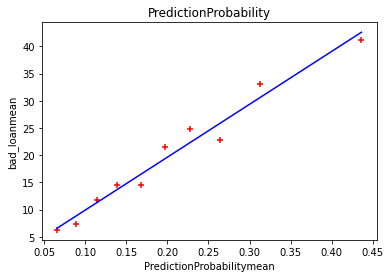

In [189]:
FinalDataFrame_  = plot_decile(Resultdata,orderby_feild = 'PredictionProbability',groupno=10)

Test the model prediction results through decile-wise output and a scatter plot with a linear regression line. Additionally, compare the actual bad loan percentage against the predicted probability, revealing a remarkably close alignment between the two scores.